In [1]:
#Import packages
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import xclim

In [2]:
#Load data
Humidity = xr.open_dataset('/home/ester/Desktop/Ester AIMS/AIMS project/Era5_dew_2mtemp.nc')
# Humidity

In [3]:
#Magnuss coefficients
beta = 17.625
gamma = 243.04
#Convert units from Kelvin to degrees celsius
Dew_Temp = Humidity['d2m'] - 273.15
Temp = Humidity['t2m'] - 273.15

In [6]:
#Apply the magnus dew point formula
Hum = 100 * (np.exp((beta * Dew_Temp) / (gamma + Dew_Temp)) / np.exp((beta * Temp) / (gamma + Temp)))

In [29]:
#Add humidity variable to the original data
Humid = xr.DataArray(data = Hum, coords = Temp.coords, dims = Temp.dims, name = 'hum')

if 'hum' not in Humidity:
    Humidity['hum'] = Humid

In [30]:
# Humidity

In [31]:
# Slicing the region
hum=Humidity.sel(longitude=slice(33,42),latitude=slice(5,-5))
# ds1

In [32]:
#Select humidity variable 
hum = hum['hum']

In [33]:
# Descriptive statistics
mean = hum.mean().values
std_dev = hum.std().values
minimum = hum.min().values
percentile_25 = np.percentile(hum,25)
median = hum.median().values
percentile_75 = np.percentile(hum, 75)
maximum = hum.max().values

# Print the results
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Minimum:", minimum)
print("25th Percentile:", percentile_25)
print("Median:", median)
print("75th Percentile:", percentile_75)
print("Maximum:", maximum)


Mean: 61.45031
Standard Deviation: 13.731642723083496
Minimum: 18.861724853515625
25th Percentile: 51.22544002532959
Median: 61.80431365966797
75th Percentile: 72.97584342956543
Maximum: 93.5013198852539


In [34]:
# Convert latitude from degrees to radians and the cosine to adjust dataset values
weights = np.cos(np.deg2rad(hum.latitude))
weights.name = "weights"
hum_weighted = hum.weighted(weights)
hum_mean = hum_weighted.mean(["longitude", "latitude"])

In [35]:
# hum_mean

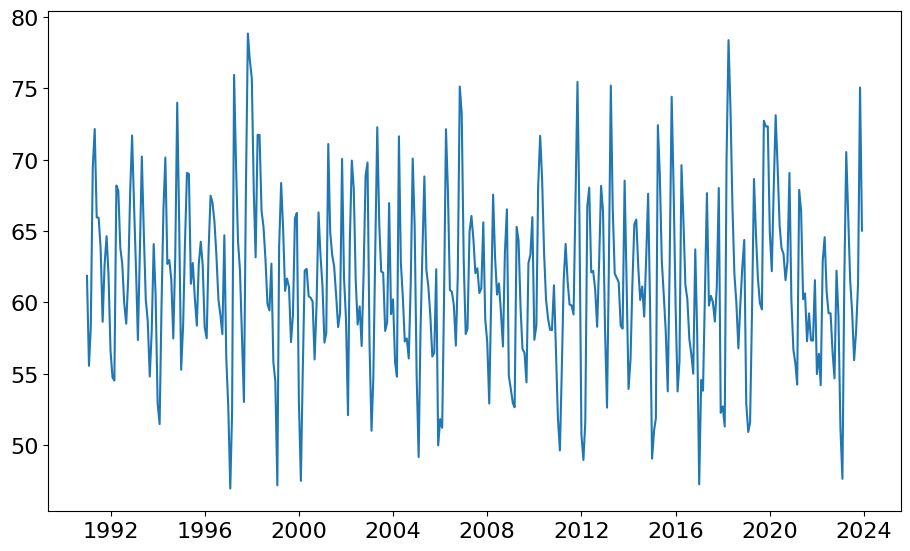

In [36]:
# Create a figure for the plot
fig, ax = plt.subplots(1, 1, figsize = (11, 6.5))
x = hum_mean['time']
y = hum_mean
plt.plot(x,y)

In [37]:
# weighted mean and std time series data grouped by years
hum_yearly = hum_mean.groupby('time.year').mean()
std = hum_mean.groupby('time.year').std()

Text(0.5, 1.0, 'Yearly average time series for Humidity')

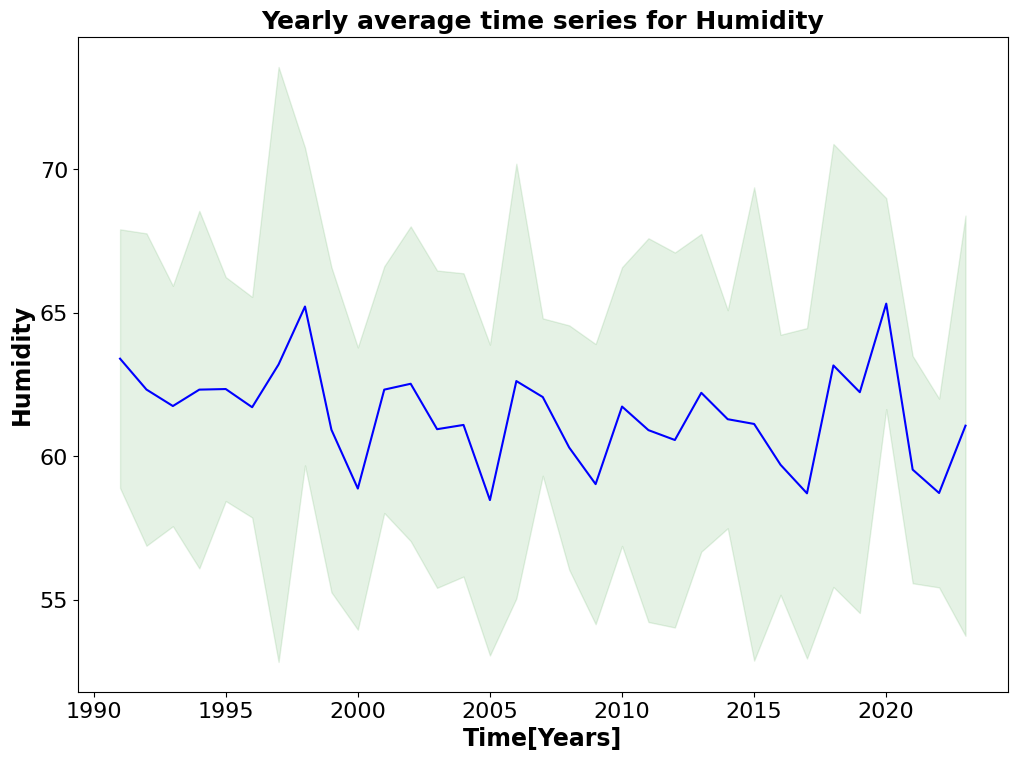

In [38]:
# Create figure and axis object for the plot
fig, ax = plt.subplots(1, 1, figsize = (12, 8.5))

ax.plot(hum_yearly.year, hum_yearly, color='blue', label='mean')
ax.fill_between(hum_yearly.year, (hum_yearly + std), (hum_yearly - std), alpha=0.1, color='green', label='+/- 1 SD')
# Set the x-axis label and the y-axis label
ax.set_xlabel('Time[Years]', fontweight='bold',  fontsize='17', horizontalalignment='center')
ax.set_ylabel('Humidity', fontweight='bold', fontsize='17')
plt.title('Yearly average time series for Humidity', fontweight='bold', fontsize='18')

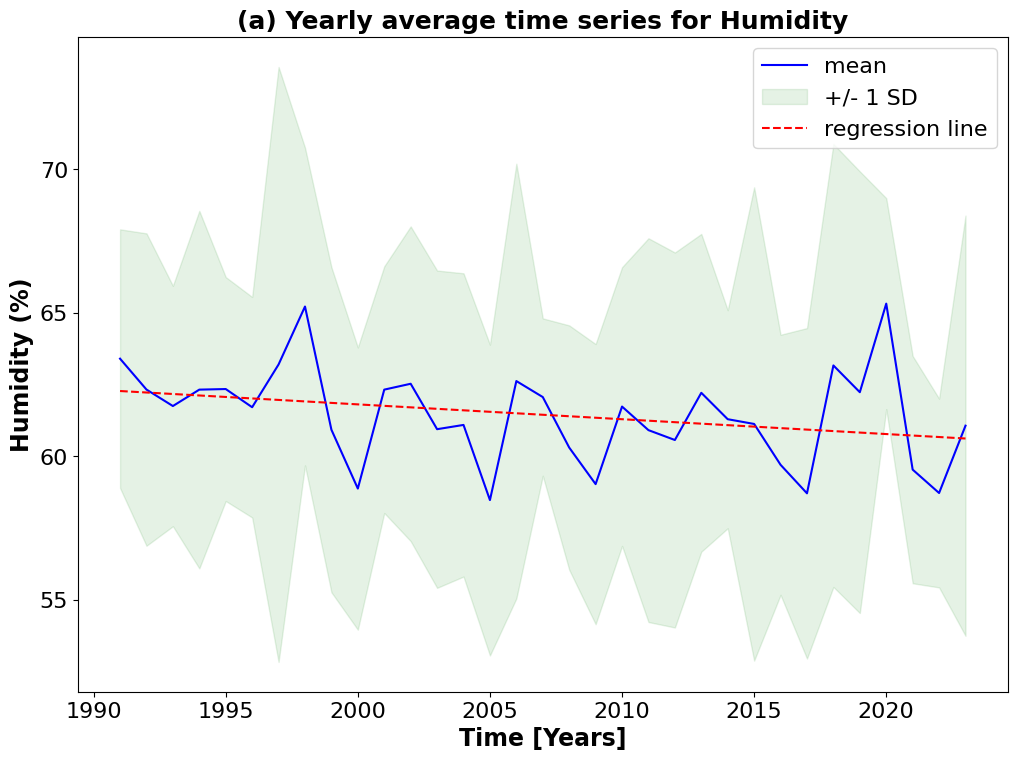

In [39]:
# Calculate regression line
slope, intercept = np.polyfit(hum_yearly.year, hum_yearly, 1)
regression_line = slope * hum_yearly.year + intercept

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8.5))

# Plot the data
ax.plot(hum_yearly.year, hum_yearly, color='blue', label='mean')
ax.fill_between(hum_yearly.year, (hum_yearly + std), (hum_yearly - std), alpha=0.1, color='green', label='+/- 1 SD')

# Plot the regression line
ax.plot(hum_yearly.year, regression_line, color='red', linestyle='--', label='regression line')

# Set labels and title
ax.set_xlabel('Time [Years]', fontweight='bold', fontsize=17, horizontalalignment='center')
ax.set_ylabel('Humidity (%)', fontweight='bold', fontsize=17)
plt.title('(a) Yearly average time series for Humidity', fontweight='bold', fontsize='18')

# Add legend
ax.legend()

plt.show()


Text(0.5, 1.0, 'Monthly climatologogy of Humidity (1991-2023)')

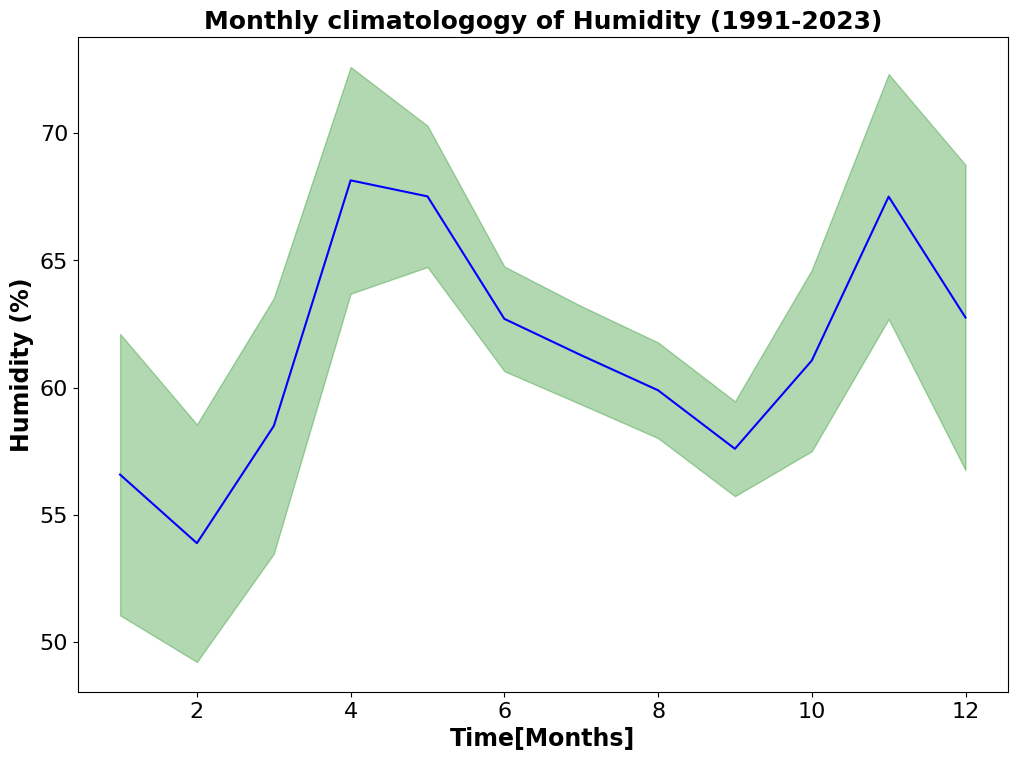

In [41]:
#weighted mean and std humidity data grouped by month
month = hum_mean.groupby('time.month').mean()
std = hum_mean.groupby('time.month').std()
fig, ax = plt.subplots(1, 1, figsize = (12, 8.5))
# Plot the monthly mean humidity data
ax.plot(month.month, month, color='blue', label='mean')
ax.fill_between(month.month, (month + std), (month - std), alpha=0.3, color='green', label='+/- 1 SD')
ax.set_xlabel('Time[Months]', fontweight='bold',  fontsize='17', horizontalalignment='center')
ax.set_ylabel('Humidity (%)', fontweight='bold', fontsize='17')
#Set title
plt.title('Monthly climatologogy of Humidity (1991-2023)', fontweight='bold', fontsize='18')

In [42]:
# Select data for the year 2023 and 2022
hum_23 = hum.sel(time=slice('2023-01-01','2023-12-01'))
hum_22 = hum.sel(time=slice('2022-01-01','2022-12-01'))

In [43]:
#weights based on latitude for the year 2023 data
weights = np.cos(np.deg2rad(hum_23.latitude))
weights.name = "weights"
hum_weighted = hum_23.weighted(weights)
hum_mean = hum_weighted.mean(["longitude", "latitude"])
#weights based on latitude for the year 2022 data
weights2 = np.cos(np.deg2rad(hum_22.latitude))
weights2.name = "weights"
hum_weighted2 = hum_22.weighted(weights2)
hum_mean2 = hum_weighted2.mean(["longitude", "latitude"])

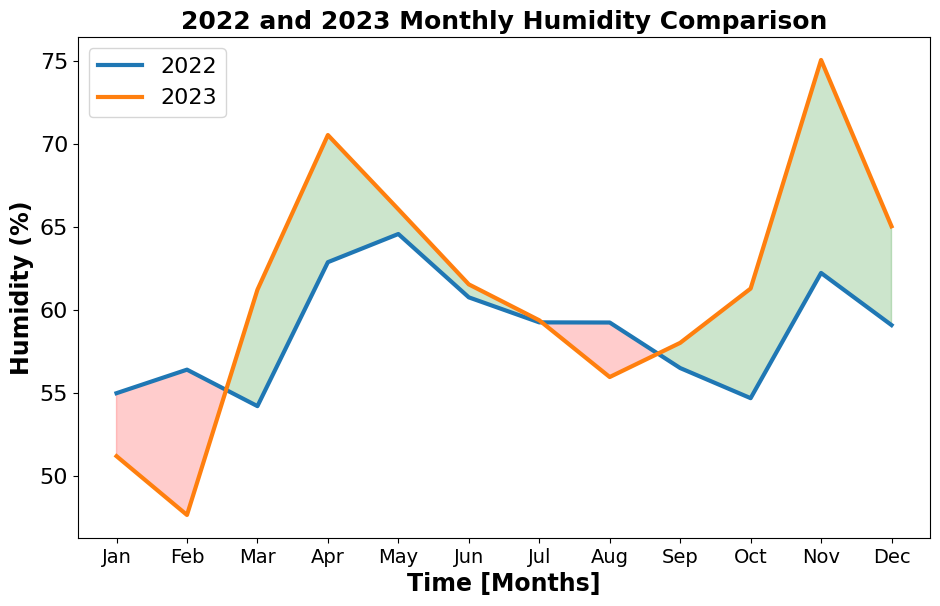

In [45]:
#mean and std of the monthly humidity for 2023
month = hum_mean.groupby('time.month').mean()
std = hum_mean.groupby('time.month').std()
#mean and std of the monthly humidity for 2022
month2 = hum_mean2.groupby('time.month').mean()
std2 = hum_mean2.groupby('time.month').std()

fig = plt.figure(figsize=(11, 6.5))
#data for plotting
x = month['month']
y = month
x2 = month2['month']
y2 = month2
#create the plot
plt.plot(x2, y2, linewidth=3, label='2022')
plt.plot(x, y, linewidth=3, label='2023')
plt.fill_between(x, y, y2, where=(y > y2), interpolate=True, color='green', alpha=0.2)
plt.fill_between(x, y, y2, where=(y < y2), interpolate=True, color='red', alpha=0.2)
# Setting x-ticks
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=np.arange(1, 13), labels=month_names, fontsize =14)
# Set x-axis and y-axis label label with bold font and specified font size
plt.xlabel('Time [Months]', fontweight='bold', fontsize=17, horizontalalignment='center')
plt.ylabel('Humidity (%)', fontweight='bold', fontsize=17)
plt.title('2022 and 2023 Monthly Humidity Comparison', fontweight='bold', fontsize=18)
plt.legend()
plt.show()

In [46]:
# Select years between 1991 and 2020 (climatology)
hum_subset = hum_yearly.where((hum_yearly.year > 1990) & (hum_yearly.year < 2021), drop=True)
hum_clim = hum_subset.mean()
hum_anom = hum_yearly - hum_clim

In [47]:
# Convert the xarray dataset to a pandas DataFrame
df = hum_anom.to_dataframe()
#indicate whether the anomaly values are positive or not
df['positive'] = df['hum'] > 0

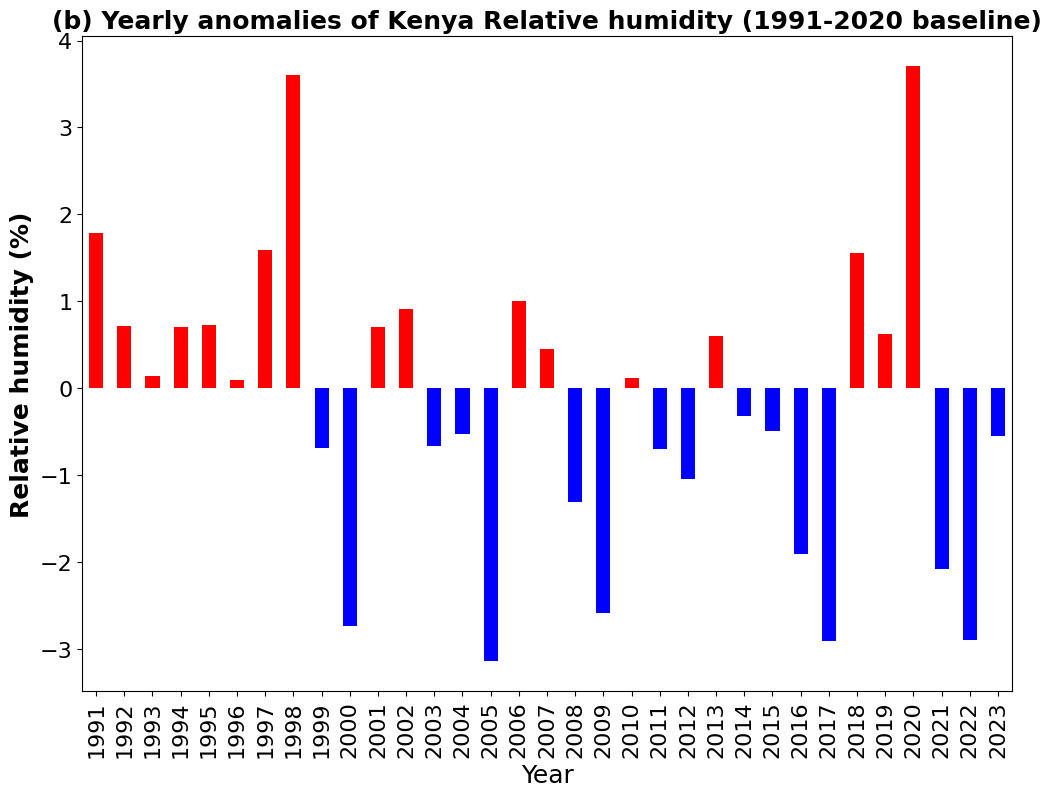

In [48]:
plt.rcParams.update({'font.size': 16})
figsize = (12, 8.5)

# Create a plot
df['hum'].plot(kind='bar', color=df.positive.map({True: 'red', False: 'blue'}), figsize=figsize)

# Set the labels and title
plt.xlabel('Year', fontsize=18)
plt.ylabel('Relative humidity (%)', fontsize=18, fontweight = 'bold') 
plt.title('(b) Yearly anomalies of Kenya Relative humidity (1991-2020 baseline)', fontsize=18, fontweight='bold')  
# Display the plot
plt.show()


# Visualization

In [49]:
#Read data
Humidity

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 396)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2023-12-01
Data variables:
    d2m        (time, latitude, longitude) float32 248.3 248.3 ... 241.7 241.7
    t2m        (time, latitude, longitude) float32 250.9 250.9 ... 245.1 245.1
    hum        (time, latitude, longitude) float32 78.74 78.74 ... 73.24 73.24
Attributes:
    Conventions:  CF-1.6
    history:      2024-04-16 22:01:11 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [50]:
#Select year 2022
Hum_2022 = Humidity['hum'].sel(time='2022')
# Calculate average humidity for 2022
Humidity_2022_avg = Hum_2022.mean(dim='time')

Text(0, 0.5, 'Humidity (%)')

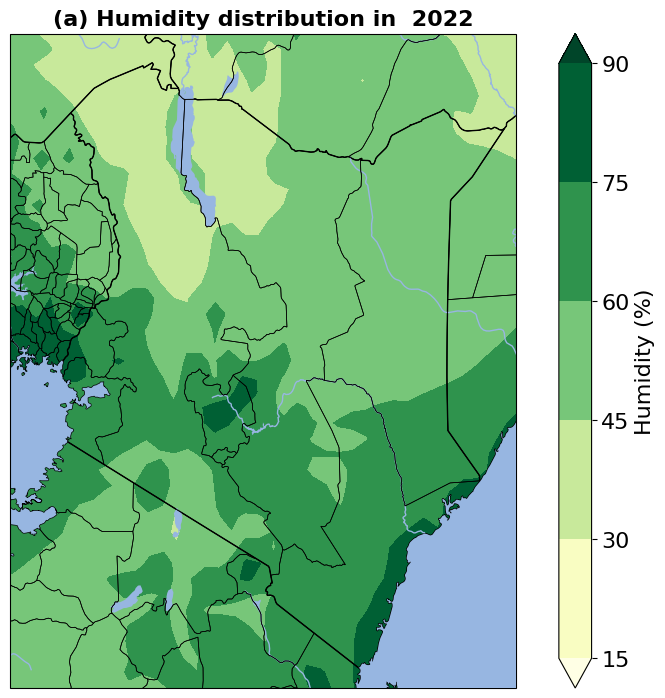

In [27]:
# Create a figure with specified map projection
fig = plt.figure(figsize=(11, 8.5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))

# Add state boundaries with a width scale of 10m
ax.add_feature(cf.STATES.with_scale('10m'), zorder=3, linewidth=0.5)

# Make a filled contour plot
cs = ax.contourf(Humidity_2022_avg['longitude'], Humidity_2022_avg['latitude'], Humidity_2022_avg,
                 transform=ccrs.PlateCarree(), cmap='YlGn', extend='both')
# ax.set_extent([33, 45, -5, 6])
ax.set_extent([33, 42, -5, 5.5])
# Add coastlines, borders, ocean, lakes, rivers
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.OCEAN, zorder = 100)
ax.add_feature(cf.LAKES)
ax.add_feature(cf.RIVERS)
# ax.gridlines()

#title of the map
ax.set_title('(a) Humidity distribution in  2022', fontsize=16, fontweight = 'bold')

# Add colorbar
cbar = plt.colorbar(cs, label='Humidity (%)')
cbar.ax.set_ylabel('Humidity (%)', fontsize=16)

In [90]:
#Select year 2023
Hum_2023 = Humidity['hum'].sel(time='2023')
# Calculate average humidity for 2023
Humidity_2023_avg = Hum_2023.mean(dim='time')

Text(0, 0.5, 'Humidity (%)')

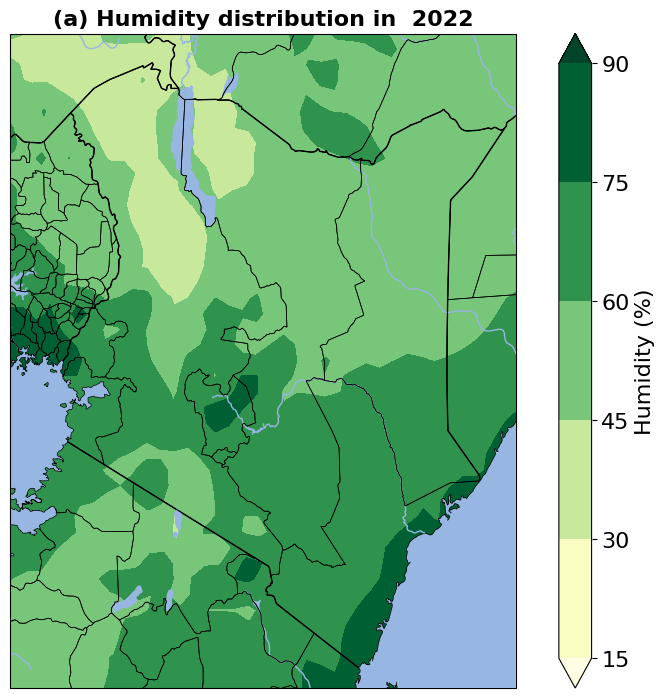

In [93]:
# Create a figure with specified map projection
fig = plt.figure(figsize=(11, 8.5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))

# Add state boundaries with a width scale of 10m
ax.add_feature(cf.STATES.with_scale('10m'), zorder=3, linewidth=0.5)

# Make a filled contour plot
cs = ax.contourf(Humidity_2023_avg['longitude'], Humidity_2023_avg['latitude'], Humidity_2023_avg,
                 transform=ccrs.PlateCarree(), cmap='YlGn', extend='both')
# ax.set_extent([33, 45, -5, 6])
ax.set_extent([33, 42, -5, 5.5])
# Add coastlines, borders, ocean, lakes, rivers
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.OCEAN, zorder = 100)
ax.add_feature(cf.LAKES)
ax.add_feature(cf.RIVERS)
# ax.gridlines()

#title of the map
ax.set_title('(a) Humidity distribution in  2022', fontsize=16, fontweight = 'bold')

# Add colorbar
cbar = plt.colorbar(cs, label='Humidity (%)')
cbar.ax.set_ylabel('Humidity (%)', fontsize=16)

# Humidity difference between 2022 and 2023

In [94]:
#2023-2022 anomaly
diff_23_20 = Humidity_2023_avg - Humidity_2022_avg

Text(0, 0.5, 'Humidity (%)')

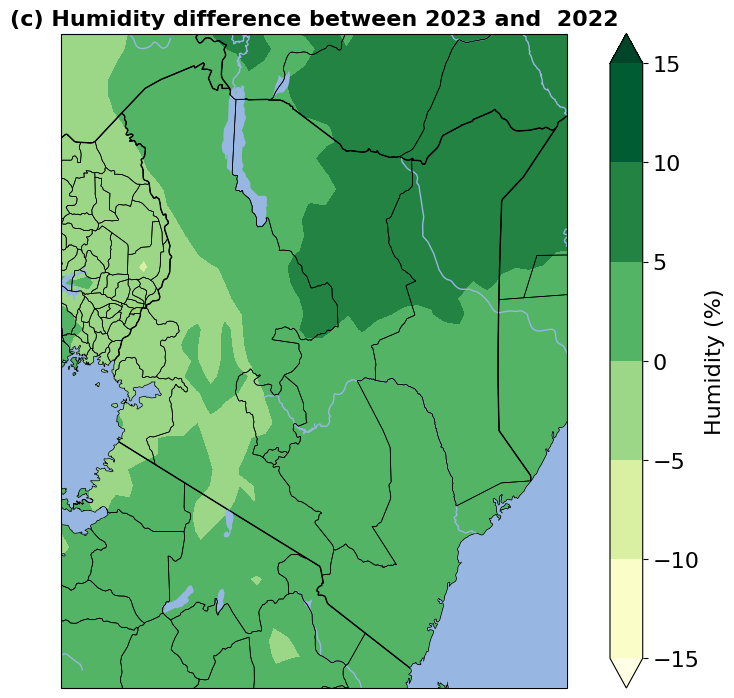

In [96]:
# Create a figure with specified map projection
fig = plt.figure(figsize=(11, 8.5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))

# Add state boundaries with a width scale of 10m
ax.add_feature(cf.STATES.with_scale('10m'), zorder=3, linewidth=0.5)

# Make a filled contour plot
cs = ax.contourf(diff_23_20['longitude'], diff_23_20['latitude'], diff_23_20,
                 transform=ccrs.PlateCarree(), cmap='YlGn', extend='both')
# ax.set_extent([33, 45, -5, 6])
ax.set_extent([33, 42, -5, 5.5])
# Add coastlines, borders, ocean, lakes, rivers
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.OCEAN, zorder = 100)
ax.add_feature(cf.LAKES)
ax.add_feature(cf.RIVERS)
# ax.gridlines()

#title of the map
ax.set_title('(c) Humidity difference between 2023 and  2022', fontsize=16, fontweight = 'bold')

# Add colorbar
cbar = plt.colorbar(cs, label='Humidity (%)')
cbar.ax.set_ylabel('Humidity (%)', fontsize=16)

# 2023 Precipitation anomalies

In [104]:
#Select year, 1991 to 2020
Hum_91_20 = Humidity['hum'].sel(time =slice('1991','2020'))
#Average tp for the year 2023
Hum_91_20_avg = Hum_91_20.mean(dim='time')

#2023 Anomaly
anom_2023 = Humidity_2023_avg - Hum_91_20_avg

Text(0, 0.5, 'Humidity (%)')

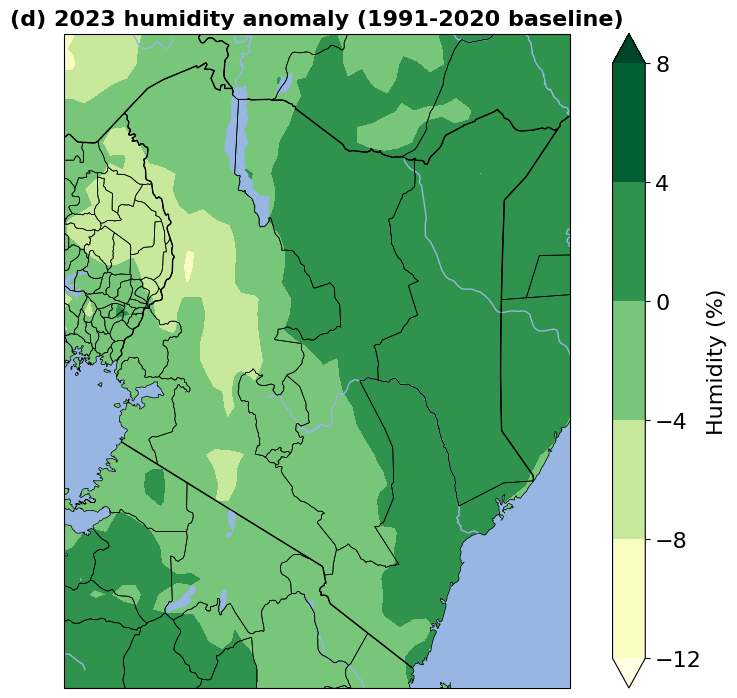

In [105]:
# Create a figure with specified map projection
fig = plt.figure(figsize=(11, 8.5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))

# Add state boundaries with a width scale of 10m
ax.add_feature(cf.STATES.with_scale('10m'), zorder=3, linewidth=0.5)

# Make a filled contour plot
cs = ax.contourf(anom_2023['longitude'], anom_2023['latitude'], anom_2023,
                 transform=ccrs.PlateCarree(), cmap='YlGn', extend='both')
# ax.set_extent([33, 45, -5, 6])
ax.set_extent([33, 42, -5, 5.5])
# Add coastlines, borders, ocean, lakes, rivers
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.OCEAN, zorder = 100)
ax.add_feature(cf.LAKES)
ax.add_feature(cf.RIVERS)
# ax.gridlines()

#title of the map
ax.set_title('(d) 2023 humidity anomaly (1991-2020 baseline)', fontsize=16, fontweight = 'bold')

# Add colorbar
cbar = plt.colorbar(cs, label='Humidity (%)')
cbar.ax.set_ylabel('Humidity (%)', fontsize=16)